In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
path = ('/content/drive/MyDrive/Data_Science /Data_set/amman_data_For_ML.csv')
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
print(df.head())

            maxtempC  mintempC  avgtempC  totalprecipMM  windspeedKmph  \
date                                                                     
2008-07-01        34        24        28            0.0             12   
2008-07-02        34        23        28            0.0             13   
2008-07-03        34        23        27            0.0             12   
2008-07-04        34        21        27            0.0             13   
2008-07-05        34        23        28            0.0             13   

            sunhour  weatherCode  humidity  visibilityKm  pressureMB  ...  \
date                                                                  ...   
2008-07-01     13.6          113        48            10        1006  ...   
2008-07-02     13.6          113        47            10        1006  ...   
2008-07-03     13.6          113        51            10        1006  ...   
2008-07-04     13.6          113        54            10        1006  ...   
2008-07-05     13.6

In [ ]:
features = df.drop(['maxtempC','mintempC','avgtempC'],axis = 1)
target = df[['maxtempC']]

In [ ]:
scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target).reshape(-1)

In [ ]:
def create_dataset(X, y, time_steps=1):
  Xs, ys = [], []
  for i in range(len(X)-time_steps):
    Xs.append(X[i:(i+time_steps)])
    ys.append(y[i+time_steps])
  return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 7
X ,y = create_dataset(features_scaled,target_scaled,time_steps)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential([

    LSTM(units = 100,
         return_sequences = True,
         input_shape = (X_train.shape[1],
                        X_train.shape[2])),
    Dropout(0.2),
    LSTM(units = 50,
         return_sequences = True),
    Dropout(0.2),
    LSTM(units = 50,
         return_sequences = True),
    Dropout(0.2),
    LSTM(units = 50),
    Dropout(0.2),
    Dense(units = 1)
])

model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs = 100,
                    batch_size = 16,
                    validation_data = (X_test, y_test),
                    verbose = 1)

model.save('amman_model.h5')

Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0562 - val_loss: 0.0127
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0110 - val_loss: 0.0119
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0101 - val_loss: 0.0110
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0103 - val_loss: 0.0108
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0097 - val_loss: 0.0126
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0093 - val_loss: 0.0122
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0088 - val_loss: 0.0103
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0081 - val_loss: 0.0072
Epoch 9/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0069 - val_loss: 0.0074
Epoch 10/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0068 - val_loss: 0.0050
Epoch 11/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 12/100
234/234 ━━━━━━━━

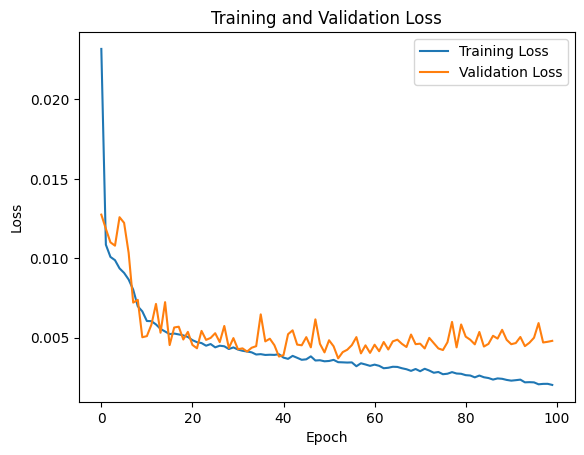

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


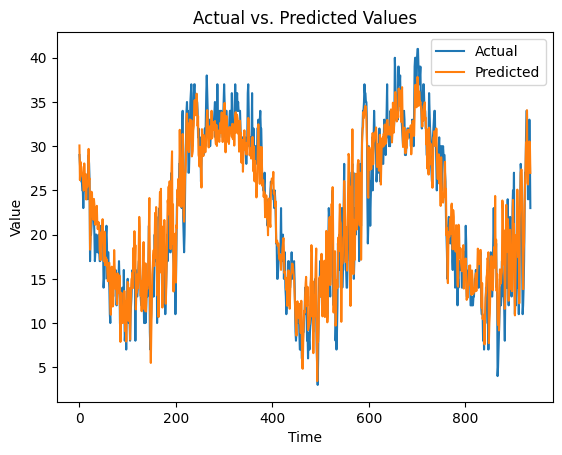

In [ ]:
y_pred = model.predict(X_test)
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(scaler.inverse_transform(y_pred), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
X_train.shape

(3698, 60, 21)

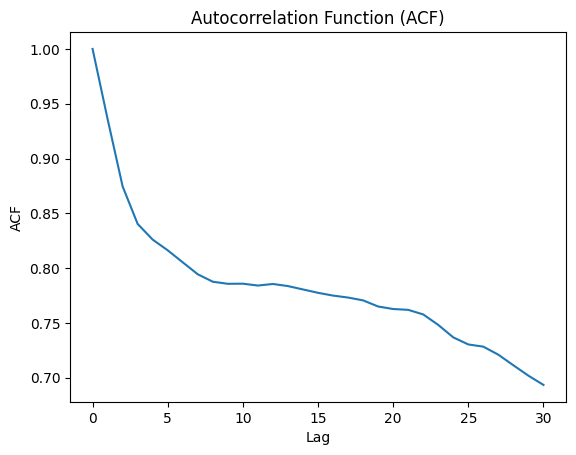

In [ ]:
from statsmodels.tsa.stattools import acf
acf_values = acf(y_train, nlags=30)
plt.plot(acf_values)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

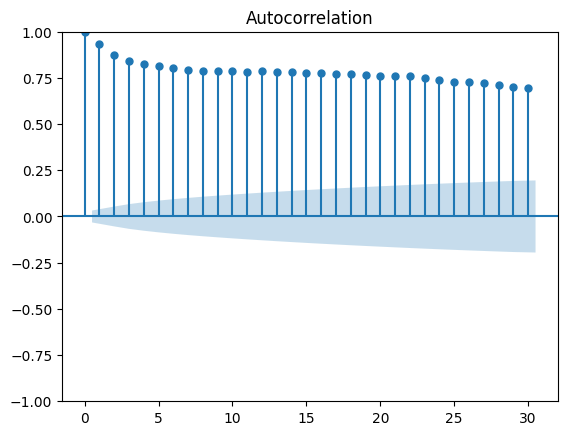

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y_train, lags=30)
plt.show()